# Лабораторная работа №1
## ПМ-21М
## Егор Решетников
### Вариант 6
Настройка среды для проведения анализа метода ближайшего соседа.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.grid'] = True

## Задание №1

Создать обучающий набор данных $T$ из $N$ (номер варианта, умноженный на 100) векторов $(x_i, t_i)$, где $x$ $-$ случайно выбранная из отрезка $[0;1]$ величина,
$t = \sin(2\pi x) + \varepsilon$, а $\varepsilon$ $-$ гауссова величина с нулевым средним и СКО = 0.3.

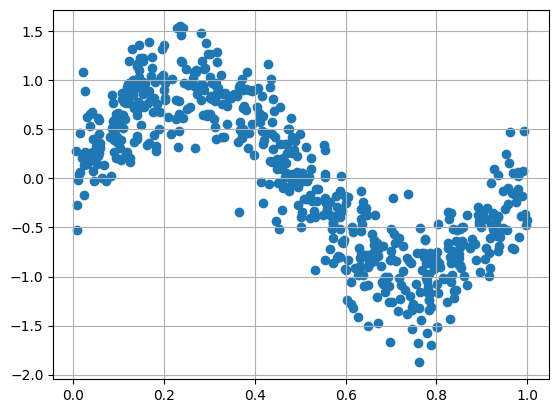

In [2]:
rng = np.random.default_rng(seed=42)

N = 600
x = rng.uniform(size=N)
t = np.sin(2*np.pi*x) + rng.normal(scale=0.3, size=len(x))

plt.scatter(x, t)

## Задание №2

Создать аналогичным образом тестовый набор данных $T'$ из других $N/4$ тестовых векторов $(x_i, t_i)$.
Деление нацело в питоне - это операция `a // b`.

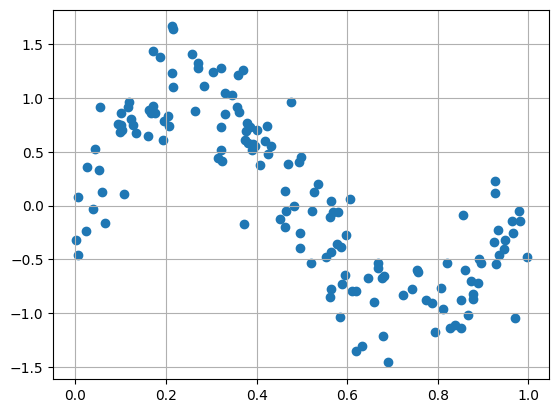

In [3]:
xx = rng.uniform(size=N//4)
tt = np.sin(2*np.pi*xx) + rng.normal(scale=0.3, size=len(xx))

plt.scatter(xx, tt)

## Задание №3

Методом $k$-NN с различными $k$ (обязательно рассмотреть $k = 1$ и $k = N$) определить среднюю ошибку
$E(f, T) = \frac{1}{N} \sum_{i=1}^{N} E\left( f(x_i), t_i \right)$
(штрафная функция $-$ квадрат разности истинного и предсказанного значений $E(r, y) = {\lVert r - y \rVert}^2$)  для обучающего и для тестового наборов.
Построить зависимости средних ошибок от $k$ в виде 2 графиков для $E(T)$ и $E(T')$.

Min = 0.15080891893446577 index = 8
CPU times: total: 4min 18s
Wall time: 4min 30s


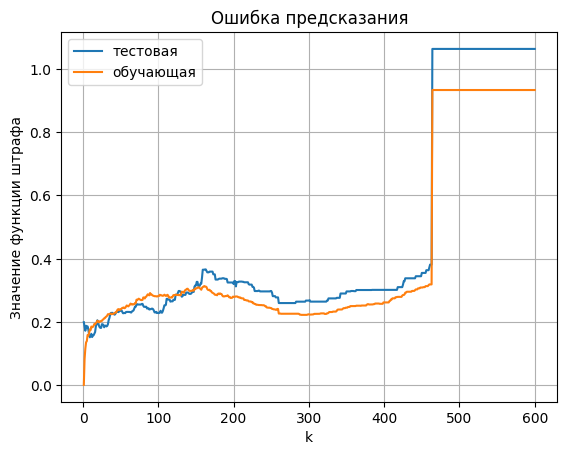

In [4]:
%%time

def err(f, t):
    return np.mean((f-t)**2)

def most_common(lst):
    counts = np.bincount(lst)
    return np.argmax(counts)

class KMean:
    def __init__(self, k, x, t):
        self.k, self.x, self.t = k, x, t

    def _decision(self, m):
        distance = (self.x - m) ** 2
        first_k_ordered = distance.argpartition(np.arange(self.k))[0:self.k]
        idx = most_common(first_k_ordered)
        return self.t[idx]

    def __call__(self, xx):
        return np.array([self._decision(m) for m in xx])

k = np.arange(1, len(x) + 1)
y, yy = [], []
for kk in k:
    kmean = KMean(kk, x, t)
    y.append(err(kmean(xx), tt))
    yy.append(err(kmean(x), t))

plt.plot(k, y, label='тестовая')
plt.plot(k, yy, label='обучающая')
plt.xlabel('k')
plt.ylabel('Значение функции штрафа')
plt.title('Ошибка предсказания')
plt.legend()

kidx = np.argmin(y)
print("Min =", y[kidx], "index =", kidx)

## Задание №4

По графикам, полученным в п.3, сделайте выводы о характере зависимости эмпирического риска $E(f, T)$ от $k$.
Определите значение $k$, для которого значение ошибки $E(f, T)$ получается наименьшим.
Сравните значения ошибок, получаемых на обучающем и тестовом наборах данных.

### Выводы

Наименьшее $k$, для которого наблюдается минимальное значение ошибки, составило 8. Это соотносится с теоретическими предположением о том, что наиболее оптимальное значение $k$ находится близко к единице, но превышает её. В таком случае метод не обязательно безошибочно распознает точки обучающего набора, но при небольших $k$, как правило, меньше ошибается на неизвестных ему векторах.


Когд $k$  приближается  $N$,  распознаватель дает постоянный ответ, не зависящий от признаков, что видно на графике.
